# Project 2

## Installing all the pip

In [10]:
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install pandas numpy
%pip install nltk spacy
%pip install PyPDF2 python-docx pdfplumber
%pip install scikit-learn
%pip install torch
%pip install transformers
%pip install matplotlib seaborn plotly wordcloud
%pip install openpyxl
%pip install joblib
%pip install streamlit
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl (12.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.meta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


## Imports 

In [12]:
# Core Libraries
import pandas as pd
import numpy as np
import re
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Text & Document Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
import spacy
import docx  # from python-docx
import PyPDF2
import pdfplumber

# Download NLTK resources (these lines will download necessary data the first time they're run)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

# Machine Learning (Scikit-learn)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)

# Deep Learning (PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Embeddings: Word2Vec, GloVe, fastText
import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.models.fasttext import load_facebook_vectors
# Optional fasttext lib if not using Gensim version
# import fasttext
# import fasttext.util

# Streamlit Web App
import streamlit as st

# Model Persistence
import joblib  # or import pickle

# Data Analysis & Preprocessing: Data exploration and preprocessing sections

Analyzeing AI vs Human text datasets, identify patterns, and prepare my data for model training. 

Implement different features: engineering and selection processes, extracting meaningful features

In [16]:
# Data Loading
def data_loading():
    print("Please upload the training Excel file:")
    # REMOVED: header=1. Pandas defaults to header=0 (first row) which is correct.
    train_df = pd.read_excel("AI_vs_human_train_dataset.xlsx")

    print("\nFirst 5 rows of the dataset:")
    print(train_df.head(5))

    print("\nGeneral information about the dataset:")
    print(train_df.info())

    print("\nTotal number of essays:", len(train_df))

    print("\nClass distribution:")
    print(train_df['label'].value_counts())

    return train_df

# Call the function
train_df = data_loading()

print("------------------------------------------------------------------------------------------------------------------------------------------\n")

# Text Cleaning
def text_cleaning(input_essay):
    # Added robust check for non-string input, returning empty string for processing
    if not isinstance(input_essay, str):
        return ""

    input_essay = input_essay.lower()
    input_essay = re.sub(r'\d+', '', input_essay)  # Remove digits
    input_essay = re.sub(r'[^\w\s]', '', input_essay)  # Remove punctuation
    input_essay = re.sub(r'\b\w*\d\w*\b', '', input_essay)  # Remove alphanumerics
    input_essay = re.sub(r'\s+', ' ', input_essay)  # Normalize whitespace
    return input_essay.strip() # .strip() to remove leading/trailing whitespace

# Apply text cleaning
train_df['processed_clean_essay'] = train_df['essay'].apply(text_cleaning)
print("Step 1: Text cleaning complete.")

print("---------------------------------------------------------------------------------------------------------------------")

# 2. Stopword Removal
stop_words_of_english = set(stopwords.words('english'))

def stop_word_removal(input_essay):
    words = input_essay.split()
    filtered_tokens = []
    for word in words:
        if word in stop_words_of_english:
            continue
        if len(word.strip()) < 2:
            continue
        filtered_tokens.append(word.strip())
    return ' '.join(filtered_tokens)

# Apply stopword removal
train_df['processed_stop_word_removal'] = train_df['processed_clean_essay'].apply(stop_word_removal)
print("Step 2: Stopword removal complete.")

print("---------------------------------------------------------------------------------------------------------------------")

# 3. Word Normalization (Lemmatization)
Lemmatizer = WordNetLemmatizer()

def word_normalization(input_essay):
    words = input_essay.split()
    lemmatized_words = [Lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization
# CORRECTED TYPO HERE: changed 'normalizataion' to 'normalization'
train_df['processed_word_normalization'] = train_df['processed_stop_word_removal'].apply(word_normalization)
print("Step 3: Word normalization (lemmatization) complete.")

# This line should now print correctly as the column name is fixed.
print(train_df[['essay', 'processed_word_normalization']].head())

Please upload the training Excel file:

First 5 rows of the dataset:
                                               essay  label
0  International sports events require the most w...      0
1  Globalisation has become a significant aspect ...      0
2  There is an ever-increasing number of bullying...      0
3  It is commonly believed, that companies should...      0
4  Despite knowing about the adverse effects of c...      0

General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   essay   3728 non-null   object
 1   label   3728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.4+ KB
None

Total number of essays: 3728

Class distribution:
label
0    1864
1    1864
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------

## Feature Extraction with TF-IDF

In this section, we convert the cleaned and normalized text data into numerical features using the TF-IDF technique.

TF-IDF measures the importance of a word in a document relative to the entire corpus. Words that occur frequently in a document but rarely across all documents are assigned higher weights. This helps the model focus on meaningful and distinctive terms.

We configure the TfidfVectorizer with different parameters such as:

  1. ngram_range: to capture single words and multi-word phrases
  2. max_features: to limit the vocabulary size to the most frequent words
  3. min_df and max_df: to remove rare and overly common terms

These features serve as the input to the machine learning models for classification.

In [17]:
# Define TF-IDF Vectorizer Function
def tfidf_vectorizer_component():
    """
    Initialize and return a TF-IDF vectorizer.
    """
    tfidf = TfidfVectorizer()
    print("\nStep 4: TF-IDF vectorizer initialized.")
    return tfidf

# Call the function (if you want to see its basic form)
tfidf = tfidf_vectorizer_component()
print("---------------------------------------------------------------------------------------------------------------------")
# Define TF-IDF Parameter Grid for GridSearchCV
def get_tfidf_parameter_grid():
    """
    Returns the parameter grid for TF-IDF tuning in a pipeline where the step is named 'tfidf'.
    """
    param_grid = {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
        'tfidf__max_features': [1000, 2000, 3000, 5000],
        'tfidf__min_df': [1, 5, 10],
        'tfidf__max_df': [0.7, 0.8, 0.9]
    }
    print("TF-IDF parameter grid created.")
    return param_grid

# Call the function
tfidf_parameter_grid = get_tfidf_parameter_grid()


Step 4: TF-IDF vectorizer initialized.
---------------------------------------------------------------------------------------------------------------------
TF-IDF parameter grid created.


# Model Development & Optimization section:
Covering both the machine learning models (SVM, Decision Tree, AdaBoost) and the deep learning models (CNN, LSTM, RNN)

## To streamline preprocessing and model training, we created scikit-learn pipelines for three traditional machine learning classifiers:

    1. Support Vector Machine (SVM): Uses a kernel-based approach for high-dimensional classification and supports probability estimates for evaluation.

    2. Decision Tree: Constructs interpretable decision rules based on feature splits.

    3. AdaBoost Classifier: An ensemble technique that boosts the performance of weak learners by focusing on misclassified examples.

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import joblib

print("--- Pipeline Creation ---")

# 1. SVM Pipeline
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC(random_state=42, probability=True))
])
print("SVM Pipeline created.")

# 2. Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
print("Decision Tree Pipeline created.")

# 3. AdaBoost Pipeline
ab_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', AdaBoostClassifier(random_state=42))
])
print("AdaBoost Pipeline created.")

print("---------------------------------------------------------------------------------------------------------------------")

# Prepare training data for model input
try:
    X = train_df['processed_word_normalization']  # Cleaned and lemmatized text
    y = train_df['label']                         # Labels: 0 (Human), 1 (AI)

    print(f"\nShape of X (features): {X.shape}")
    print(f"Shape of y (labels): {y.shape}")
except KeyError as e:
    print(f"Error: Column '{e.args[0]}' not found in train_df. Please ensure all preprocessing steps have been completed.")

print("---------------------------------------------------------------------------------------------------------------------")

# --- Train the models ---
svm_pipeline.fit(X, y)
dt_pipeline.fit(X, y)
ab_pipeline.fit(X, y)

print("✅ All models trained successfully.")

# --- Save TF-IDF Vectorizer from SVM Pipeline ---
fitted_vectorizer = svm_pipeline.named_steps['vectorizer']
joblib.dump(fitted_vectorizer, 'models/tfidf_vectorizer.pkl')
print("✅ TF-IDF Vectorizer saved to models/tfidf_vectorizer.pkl")

# --- (Optional) Save the full pipelines as models ---
joblib.dump(svm_pipeline, 'models/svm_model.pkl')
joblib.dump(dt_pipeline, 'models/decision_tree_model.pkl')
joblib.dump(ab_pipeline, 'models/adaboost_model.pkl')
print("✅ All ML pipelines saved to 'models/' directory.")


--- Pipeline Creation ---
SVM Pipeline created.
Decision Tree Pipeline created.
AdaBoost Pipeline created.
---------------------------------------------------------------------------------------------------------------------

Shape of X (features): (3728,)
Shape of y (labels): (3728,)
---------------------------------------------------------------------------------------------------------------------
✅ All models trained successfully.
✅ TF-IDF Vectorizer saved to models/tfidf_vectorizer.pkl
✅ All ML pipelines saved to 'models/' directory.


### SVM Hyperparameter Optimization: Use GridSearchCV to tune hyperparameters for the SVM model. The search will explore combinations of kernel type, regularization strength, and feature extraction settings.

In [19]:
print("\n--- Task 3: SVM Hyperparameter Optimization with GridSearchCV ---")

# Define the parameter grid to search
svm_param_grid = {
    'vectorizer__max_features':    [1000, 5000,10000],
    'vectorizer__ngram_range':     [(1,1),(1,2), (1,3)],
    'classifier__C':               [0.1, 1, 10, 100],
    'classifier__kernel':          ['linear', 'rbf'],
    'classifier__gamma':           ['scale', 'auto', 0.001, 0.01]
}

# Initialize GridSearchCV using the svm_pipeline defined above
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to your full training set
print("Fitting SVM GridSearchCV... this may take some time.")
svm_grid_search.fit(X, y)

# Extract the best estimator and its performance
best_svm_model = svm_grid_search.best_estimator_
print("\nSVM Optimization Complete.")
print("Best parameters for SVM:", svm_grid_search.best_params_)
print(f"Best cross-validated accuracy for SVM: {svm_grid_search.best_score_:.4f}")


--- Task 3: SVM Hyperparameter Optimization with GridSearchCV ---
Fitting SVM GridSearchCV... this may take some time.
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

SVM Optimization Complete.
Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear', 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 3)}
Best cross-validated accuracy for SVM: 0.9866


In [43]:
best_svm_model = svm_grid_search.best_estimator_
joblib.dump(best_svm_model, 'models/svm_model.pkl')

['models/svm_model.pkl']

 ### Decision Tree Hyperparameter Optimization: Use GridSearchCV to tune hyperparameters for the Decision Tree model. The grid includes variations in tree depth, splitting strategy, and minimum sample requirements.

In [20]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    StratifiedKFold
)

print("\nOptimizing Decision Tree...")

# Define parameter grid for Decision Tree
dt_param_grid = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1,3)],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the model
print("Fitting Decision Tree GridSearchCV...")
dt_grid_search.fit(X, y)

# Print best results
print("\nDecision Tree Optimization Complete.")
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best accuracy score for Decision Tree:", dt_grid_search.best_score_)



Optimizing Decision Tree...
Fitting Decision Tree GridSearchCV...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Decision Tree Optimization Complete.
Best parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 3)}
Best accuracy score for Decision Tree: 0.9010428774493044


In [44]:
best_dt_model = dt_grid_search.best_estimator_
joblib.dump(best_dt_model, 'models/decision_tree_model.pkl')


['models/decision_tree_model.pkl']

  ### AdaBoost Hyperparameter Optimization: Run GridSearchCV to tune the number of estimators and learning rate for the AdaBoost classifier, along with TF-IDF feature extraction settings.

In [21]:
print("\nOptimizing AdaBoost...")

# Define parameter grid for AdaBoost
ab_param_grid = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.5, 1.0, 1.5]
}

# Initialize GridSearchCV for AdaBoost
ab_grid_search = GridSearchCV(
    ab_pipeline,
    ab_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the model
print("Fitting AdaBoost GridSearchCV...")
ab_grid_search.fit(X, y)

# Print best results
print("\nAdaBoost Optimization Complete.")
print("Best parameters for AdaBoost:", ab_grid_search.best_params_)
print("Best accuracy score for AdaBoost:", ab_grid_search.best_score_)



Optimizing AdaBoost...
Fitting AdaBoost GridSearchCV...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

AdaBoost Optimization Complete.
Best parameters for AdaBoost: {'classifier__learning_rate': 1.5, 'classifier__n_estimators': 150, 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 2)}
Best accuracy score for AdaBoost: 0.9624571315472228


In [45]:
best_ab_model = ab_grid_search.best_estimator_
joblib.dump(best_ab_model, 'models/adaboost_model.pkl')


['models/adaboost_model.pkl']

### Pickle files

In [121]:
import joblib
import os

# Ensure the models directory exists
os.makedirs("models", exist_ok=True)

# Save the best-trained models from GridSearchCV (not the base pipelines)
joblib.dump(best_svm_model, 'models/svm_model.pkl')
joblib.dump(best_dt_model, 'models/decision_tree_model.pkl')
joblib.dump(best_ab_model, 'models/adaboost_model.pkl')

print("Best models from GridSearchCV saved successfully to 'models/' directory.")


Best models from GridSearchCV saved successfully to 'models/' directory.


In [122]:
print("Model loading and test data preparation complete.")

# -----------------------------------------------
# Add this block **right after the above print**
# -----------------------------------------------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n--- Performance Evaluation & Comparison ---")

# Load the best trained models
best_svm_model = joblib.load("models/svm_model.pkl")
best_dt_model = joblib.load("models/decision_tree_model.pkl")
best_ab_model = joblib.load("models/adaboost_model.pkl")

# Evaluation function
def evaluate_model(model, X_test, y_test, name):
    try:
        print("="*60)
        print(f"Evaluating Model: {name}")
        print("-" * 60)
        y_pred = model.predict(X_test)
        print(f"Accuracy Score : {accuracy_score(y_test, y_pred):.4f}")
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    except Exception as e:
        print(f"[ERROR] Failed to evaluate {name}: {e}")

# Run evaluations
evaluate_model(best_svm_model, X_test_ml, y_test_ml, "SVM")
evaluate_model(best_dt_model, X_test_ml, y_test_ml, "Decision Tree")
evaluate_model(best_ab_model, X_test_ml, y_test_ml, "AdaBoost")


Model loading and test data preparation complete.

--- Performance Evaluation & Comparison ---
Evaluating Model: SVM
------------------------------------------------------------
Accuracy Score : 0.9987

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       373

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746

Confusion Matrix:
 [[372   1]
 [  0 373]]
Evaluating Model: Decision Tree
------------------------------------------------------------
Accuracy Score : 0.9558

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       373
           1       0.98      0.93      0.95       373

    accuracy                           0.96       746
   macro avg       0.96      0.96      0.96 

## Text Vectorization for Deep Learning
We convert the preprocessed text into padded sequences of word indices using Keras's Tokenizer. This prepares the data for input into deep learning models (CNN, LSTM, RNN), which require fixed-length numerical sequences rather than sparse TF-IDF vectors

In [123]:
import gensim.downloader as api

# 1. Load GloVe embeddings
print("🔄 Loading pre-trained GloVe word vectors (glove-wiki-gigaword-100)...")
try:
    word_vectors = api.load("glove-wiki-gigaword-100")
    embedding_dim = word_vectors.vector_size
    print(f"✅ Loaded GloVe with embedding dimension: {embedding_dim}")
except Exception as e:
    print(f"❌ Error loading GloVe: {e}")
    raise

# 2. Create vocabulary from processed training data
if 'train_df' not in locals() or 'processed_word_normalization' not in train_df.columns:
    raise ValueError("❌ 'train_df' or 'processed_word_normalization' not found. Please run preprocessing first.")

# Extract words
all_words = []
for essay in train_df['processed_word_normalization']:
    if isinstance(essay, str):
        all_words.extend(essay.split())

unique_words = sorted(set(all_words))

# 3. Create word-to-index and index-to-word mappings
word_to_idx = {"<PAD>": 0, "<UNK>": 1}
idx_to_word = {0: "<PAD>", 1: "<UNK>"}

for word in unique_words:
    if word in word_vectors.key_to_index:
        index = len(word_to_idx)
        word_to_idx[word] = index
        idx_to_word[index] = word

vocab_size = len(word_to_idx)
print(f"📚 Vocabulary size (GloVe matched): {vocab_size}")

# Count Out-of-Vocabulary words
oov_count = len([w for w in unique_words if w not in word_vectors.key_to_index])
print(f"❗ OOV words (not in GloVe): {oov_count}")

# 4. Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_to_idx.items():
    if word in word_vectors.key_to_index:
        embedding_matrix[i] = word_vectors[word]
    elif word == "<UNK>":
        embedding_matrix[i] = np.full((embedding_dim,), 0.01)  # Use small constant vector for UNK

embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)
print(f"✅ Embedding matrix shape: {embedding_matrix.shape}")

# --- SAVE DEEP LEARNING RESOURCES ---
print("\n💾 Saving DL resources to 'models/' folder...")

# 5. Set MAX_SEQUENCE_LENGTH (use consistent value with training)
MAX_SEQUENCE_LENGTH = 200

# 6. Save word_to_idx dictionary
joblib.dump(word_to_idx, "models/word_to_idx.pkl")
print("✔️ Saved word_to_idx to models/word_to_idx.pkl")

# 7. Save MAX_SEQUENCE_LENGTH
joblib.dump(MAX_SEQUENCE_LENGTH, "models/MAX_SEQUENCE_LENGTH.pkl")
print("✔️ Saved MAX_SEQUENCE_LENGTH to models/MAX_SEQUENCE_LENGTH.pkl")

# 8. Save embedding matrix as .pt file
torch.save(embedding_matrix, "models/embedding_matrix.pt")
print("✔️ Saved embedding_matrix to models/embedding_matrix.pt")

print("\n✅ All deep learning resources saved successfully!")


🔄 Loading pre-trained GloVe word vectors (glove-wiki-gigaword-100)...
✅ Loaded GloVe with embedding dimension: 100
📚 Vocabulary size (GloVe matched): 12595
❗ OOV words (not in GloVe): 11545
✅ Embedding matrix shape: torch.Size([12595, 100])

💾 Saving DL resources to 'models/' folder...
✔️ Saved word_to_idx to models/word_to_idx.pkl
✔️ Saved MAX_SEQUENCE_LENGTH to models/MAX_SEQUENCE_LENGTH.pkl
✔️ Saved embedding_matrix to models/embedding_matrix.pt

✅ All deep learning resources saved successfully!


## Data Preparation for Deep Learning Models (Indexing, Padding, and DataLoaders)
This section converts preprocessed text into fixed-length sequences of word indices, prepares label tensors, and wraps the data into PyTorch DataLoaders for efficient training and validation batching.

In [124]:
# --- 5. Convert Text to Sequences of Indices and Pad ---

MAX_SEQUENCE_LENGTH = 200  # Can be adjusted based on data

def text_to_indexed_tensor(text_series, word_to_idx, max_len):
    """
    Converts a Series of preprocessed text into padded tensors of word indices.
    """
    sequences = []
    for essay in text_series:
        if isinstance(essay, str):
            indexed = [word_to_idx.get(word, word_to_idx["<UNK>"]) for word in essay.split()]
            sequences.append(indexed)
        else:
            sequences.append([])

    padded = []
    for seq in sequences:
        if len(seq) > max_len:
            padded.append(seq[:max_len])  # Truncate
        else:
            padded.append(seq + [word_to_idx["<PAD>"]] * (max_len - len(seq)))  # Pad

    return torch.tensor(padded, dtype=torch.long)

def create_label_tensor(labels):
    """
    Converts label column to float tensor for binary classification.
    """
    return torch.tensor(labels.values, dtype=torch.float32).unsqueeze(1)

print(f"\nConverting text to padded sequences with MAX_SEQUENCE_LENGTH = {MAX_SEQUENCE_LENGTH}...")

# Make sure data is ready
if 'train_df' in locals() and 'processed_word_normalization' in train_df.columns:
    X_indexed = text_to_indexed_tensor(train_df['processed_word_normalization'], word_to_idx, MAX_SEQUENCE_LENGTH)
    print(f"Text converted to indexed sequences. Shape: {X_indexed.shape}")
else:
    raise ValueError(" 'train_df' or 'processed_word_normalization' column not found. Cannot create indexed sequences.")

# Convert labels
y_tensor = create_label_tensor(train_df['label'])
print(f"Labels converted to tensor. Shape: {y_tensor.shape}")

# --- 6. Create PyTorch Dataset and DataLoader ---

from torch.utils.data import TensorDataset, DataLoader, random_split

def create_dataloaders(X_tensor, y_tensor, batch_size=64, train_split=0.8):
    """
    Combines input/output tensors, splits into train/val sets, and returns DataLoaders.
    """
    full_dataset = TensorDataset(X_tensor, y_tensor)
    print(f"\nPyTorch TensorDataset created with {len(full_dataset)} samples.")

    train_size = int(train_split * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

    print(f"Dataset split: {train_size} training / {val_size} validation samples")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    print(f" DataLoaders created (batch size = {batch_size})")
    print(f" Train batches: {len(train_loader)}, Validation batches: {len(val_loader)}")

    return train_loader, val_loader

# Create loaders
BATCH_SIZE = 64
train_loader, val_loader = create_dataloaders(X_indexed, y_tensor, batch_size=BATCH_SIZE)



Converting text to padded sequences with MAX_SEQUENCE_LENGTH = 200...
Text converted to indexed sequences. Shape: torch.Size([3728, 200])
Labels converted to tensor. Shape: torch.Size([3728, 1])

PyTorch TensorDataset created with 3728 samples.
Dataset split: 2982 training / 746 validation samples
 DataLoaders created (batch size = 64)
 Train batches: 47, Validation batches: 12


# Deep Learning Model Classes, Loss Function, Optimizer, and Device Setup


## Defining TextClassifiers

In [126]:
# --- 8. Model Definition, Instantiation, Optimizer, Loss, and Device Setup (for CNN) ---

# --- Define CNN_TextClassifier model class ---
class CNN_TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim,
                 dropout_rate, embedding_matrix, freeze_embeddings=True):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(embedding_matrix)
        self.embedding.weight.requires_grad = not freeze_embeddings

        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim,
                      out_channels=n_filters,
                      kernel_size=fs)
            for fs in filter_sizes
        ])

        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)

    def forward(self, text):
        # text: [batch size, sentence length]
        embedded = self.embedding(text)              # [batch size, sentence length, embedding_dim]
        embedded = embedded.permute(0, 2, 1)         # [batch size, embedding_dim, sentence length]
        conved = [F.relu(conv(embedded)) for conv in self.convs]  # list of [batch, n_filters, *]
        pooled = [F.max_pool1d(c, c.shape[2]).squeeze(2) for c in conved]  # list of [batch, n_filters]
        cat = self.dropout(torch.cat(pooled, dim=1))  # [batch size, n_filters * len(filter_sizes)]
        return self.fc(cat)  # [batch size, output_dim]

# --- Define LSTM_TextClassifier model class ---
class LSTM_TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim,
                 n_layers, bidirectional, dropout_rate, embedding_matrix, freeze_embeddings=True):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(embedding_matrix)
        self.embedding.weight.requires_grad = not freeze_embeddings

        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            batch_first=True,
                            dropout=dropout_rate if n_layers > 1 else 0)

        lstm_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.fc = nn.Linear(lstm_output_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))  # [batch_size, seq_len, embed_dim]
        outputs, (hidden, cell) = self.lstm(embedded)

        # Use final hidden state (concat forward + backward if bidirectional)
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        else:
            hidden = hidden[-1]

        return self.fc(self.dropout(hidden))

# --- Define RNN_TextClassifier model class ---
class RNN_TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim,
                 n_layers, dropout_rate, embedding_matrix, freeze_embeddings=True):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(embedding_matrix)
        self.embedding.weight.requires_grad = not freeze_embeddings

        self.rnn = nn.RNN(embedding_dim,
                          hidden_dim,
                          num_layers=n_layers,
                          batch_first=True,
                          dropout=dropout_rate if n_layers > 1 else 0)

        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        outputs, hidden = self.rnn(embedded)

        # Use final hidden state
        return self.fc(self.dropout(hidden[-1]))


## Setting up training components

In [138]:
# --- Setup model, optimizer, loss, and device ---
def setup_cnn_training_components(vocab_size, embedding_dim, embedding_matrix):
    """
    Instantiates the CNN model, optimizer, loss function, and moves model to appropriate device.
    Returns: model, optimizer, criterion, device
    """
    cnn_model = CNN_TextClassifier(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        n_filters=100,
        filter_sizes=[3, 4, 5],
        output_dim=1,
        dropout_rate=0.5,
        embedding_matrix=embedding_matrix,
        freeze_embeddings=True
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    cnn_model = cnn_model.to(device)

    criterion = nn.BCEWithLogitsLoss().to(device)
    optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

    print(f" CNN model initialized and moved to device: {device}")
    print(f"Loss function: BCEWithLogitsLoss | Optimizer: Adam (lr=0.001)")

    return cnn_model, optimizer, criterion, device


# --- Call the setup function ---
cnn_model, cnn_optimizer, cnn_criterion, cnn_device = setup_cnn_training_components(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    embedding_matrix=embedding_matrix
)

print("\n CNN model setup for training is complete. Ready for the training loop!")

# --- Setup LSTM Model, Optimizer, Loss, and Device (Corrected for TRAINING) ---
def setup_lstm_training_components(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                                 bidirectional, dropout_rate, embedding_matrix, freeze_embeddings=True):
    """
    Instantiates the LSTM model, optimizer, loss function, and moves model to appropriate device.
    Returns: model, optimizer, criterion, device
    """
    lstm_model = LSTM_TextClassifier( # Correct: Instantiates the class
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        hidden_dim=hidden_dim,
        output_dim=output_dim,
        n_layers=n_layers,
        bidirectional=bidirectional,
        dropout_rate=dropout_rate,
        embedding_matrix=embedding_matrix,
        freeze_embeddings=freeze_embeddings
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    lstm_model = lstm_model.to(device)

    criterion = nn.BCEWithLogitsLoss().to(device)
    optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

    print(f"\n✅ LSTM model initialized and moved to device: {device}")
    print(f"Loss function: BCEWithLogitsLoss | Optimizer: Adam (lr=0.001)")

    return lstm_model, optimizer, criterion, device


# --- Setup RNN Model, Optimizer, Loss, and Device (Corrected for TRAINING) ---
def setup_rnn_training_components(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                                 dropout_rate, embedding_matrix, freeze_embeddings=True):
    """
    Instantiates the RNN model, optimizer, loss function, and moves model to appropriate device.
    Returns: model, optimizer, criterion, device
    """
    rnn_model = RNN_TextClassifier( # Correct: Instantiates the class
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        hidden_dim=hidden_dim,
        output_dim=output_dim,
        n_layers=n_layers,
        dropout_rate=dropout_rate,
        embedding_matrix=embedding_matrix,
        freeze_embeddings=freeze_embeddings
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rnn_model = rnn_model.to(device)

    criterion = nn.BCEWithLogitsLoss().to(device)
    optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)

    print(f"\n✅ RNN model initialized and moved to device: {device}")
    print(f"Loss function: BCEWithLogitsLoss | Optimizer: Adam (lr=0.001)")

    return rnn_model, optimizer, criterion, device

 CNN model initialized and moved to device: cpu
Loss function: BCEWithLogitsLoss | Optimizer: Adam (lr=0.001)

 CNN model setup for training is complete. Ready for the training loop!


In [139]:
# After training finishes
torch.save(cnn_model.state_dict(), "models/CNN.pkl")


# CNN,LSTM, RNN Model Training Loop

In [136]:
import time
# --- CNN Model Training Loop ---
def train_cnn_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs, save_path):
    """
    Trains the CNN model, evaluates on validation set (loss only), and saves the best model.
    """
    best_valid_loss = float('inf')
    
    print(f"\nStarting CNN Training for {num_epochs} epochs...")

    for epoch in range(num_epochs):
        start_time = time.time()

        # Training phase
        model.train() # Set model to training mode
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.float() # Ensure labels are float for BCEWithLogitsLoss

            optimizer.zero_grad()
            outputs = model(inputs) # CNN outputs don't need squeeze(1) here for BCEWithLogitsLoss if labels are [batch_size, 1]
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
        
        train_loss /= len(train_loader)

        # Evaluation phase (Validation)
        model.eval() # Set model to evaluation mode
        valid_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                labels = labels.float()

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()
        
        valid_loss /= len(val_loader)

        end_time = time.time()
        epoch_mins, epoch_secs = divmod(end_time - start_time, 60)

        # Save best model based on validation loss
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            os.makedirs('models', exist_ok=True) # Ensure 'models' directory exists
            torch.save(model.state_dict(), save_path)
            print(f"Model improved! Saving best CNN model to {save_path}")

        print(f"Epoch: {epoch+1:02} | Time: {int(epoch_mins)}m {int(epoch_secs)}s")
        print(f"\tTrain Loss: {train_loss:.3f}") # Removed accuracy
        print(f"\tVal. Loss: {valid_loss:.3f}") # Removed accuracy

    print(f"\n✅ CNN Training complete!")
    print(f"Best validation loss for CNN: {best_valid_loss:.3f}")


# --- LSTM Model Training Loop ---
def train_lstm_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs, save_path):
    """
    Trains the LSTM model, evaluates on validation set (loss only), and saves the best model.
    """
    best_valid_loss = float('inf')
    
    print(f"\nStarting LSTM Training for {num_epochs} epochs...")

    for epoch in range(num_epochs):
        start_time = time.time()

        # Training phase
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.float()

            optimizer.zero_grad()
            outputs = model(inputs) # LSTM outputs might need squeeze(1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
        
        train_loss /= len(train_loader)

        # Evaluation phase (Validation)
        model.eval()
        valid_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                labels = labels.float()

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()
        
        valid_loss /= len(val_loader)

        end_time = time.time()
        epoch_mins, epoch_secs = divmod(end_time - start_time, 60)

        # Save best model based on validation loss
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            os.makedirs('models', exist_ok=True)
            torch.save(model.state_dict(), save_path)
            print(f"Model improved! Saving best LSTM model to {save_path}")

        print(f"Epoch: {epoch+1:02} | Time: {int(epoch_mins)}m {int(epoch_secs)}s")
        print(f"\tTrain Loss: {train_loss:.3f}") # Removed accuracy
        print(f"\tVal. Loss: {valid_loss:.3f}") # Removed accuracy

    print(f"\n✅ LSTM Training complete!")
    print(f"Best validation loss for LSTM: {best_valid_loss:.3f}")


# --- RNN Model Training Loop ---
def train_rnn_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs, save_path):
    """
    Trains the RNN model, evaluates on validation set (loss only), and saves the best model.
    """
    best_valid_loss = float('inf')
    
    print(f"\nStarting RNN Training for {num_epochs} epochs...")

    for epoch in range(num_epochs):
        start_time = time.time()

        # Training phase
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.float()

            optimizer.zero_grad()
            outputs = model(inputs) # RNN outputs might need squeeze(1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
        
        train_loss /= len(train_loader)

        # Evaluation phase (Validation)
        model.eval()
        valid_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                labels = labels.float()

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()
        
        valid_loss /= len(val_loader)

        end_time = time.time()
        epoch_mins, epoch_secs = divmod(end_time - start_time, 60)

        # Save best model based on validation loss
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            os.makedirs('models', exist_ok=True)
            torch.save(model.state_dict(), save_path)
            print(f"Model improved! Saving best RNN model to {save_path}")

        print(f"Epoch: {epoch+1:02} | Time: {int(epoch_mins)}m {int(epoch_secs)}s")
        print(f"\tTrain Loss: {train_loss:.3f}") # Removed accuracy
        print(f"\tVal. Loss: {valid_loss:.3f}") # Removed accuracy

    print(f"\n✅ RNN Training complete!")
    print(f"Best validation loss for RNN: {best_valid_loss:.3f}")

In [137]:
# --- Call CNN Training Loop ---
# Make sure cnn_model, cnn_optimizer, cnn_criterion, cnn_device are defined from setup_cnn_training_components.
CNN_MODEL_SAVE_PATH = 'models/CNN.pkl'

print("\nCalling CNN Model Training...")
train_cnn_model(
    model=cnn_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=cnn_optimizer,
    criterion=cnn_criterion,
    device=cnn_device,
    num_epochs=10, # Adjust as needed (e.g., 5-15 epochs is common for initial DL)
    save_path=CNN_MODEL_SAVE_PATH # ADDED: The missing save_path argument
)
print("CNN Model Training call initiated.")

# --- Call LSTM Training Loop ---
# Make sure lstm_model, lstm_optimizer, lstm_criterion, lstm_device are defined from setup_lstm_training_components.
LSTM_MODEL_SAVE_PATH = 'models/LSTM.pkl'

print("\nCalling LSTM Model Training...")
train_lstm_model(
    model=lstm_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=lstm_optimizer,
    criterion=lstm_criterion,
    device=lstm_device,
    num_epochs=10, # Adjust as needed
    save_path=LSTM_MODEL_SAVE_PATH
)
print("LSTM Model Training call initiated.")

# --- Call RNN Training Loop ---
# Make sure rnn_model, rnn_optimizer, rnn_criterion, rnn_device are defined from setup_rnn_training_components.
RNN_MODEL_SAVE_PATH = 'models/RNN.pkl'

print("\nCalling RNN Model Training...")
train_rnn_model(
    model=rnn_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=rnn_optimizer,
    criterion=rnn_criterion,
    device=rnn_device,
    num_epochs=10, # Adjust as needed
    save_path=RNN_MODEL_SAVE_PATH
)
print("RNN Model Training call initiated.")


Calling CNN Model Training...

Starting CNN Training for 10 epochs...
Model improved! Saving best CNN model to models/CNN.pkl
Epoch: 01 | Time: 0m 4s
	Train Loss: 0.633
	Val. Loss: 0.525
Model improved! Saving best CNN model to models/CNN.pkl
Epoch: 02 | Time: 0m 3s
	Train Loss: 0.440
	Val. Loss: 0.340
Model improved! Saving best CNN model to models/CNN.pkl
Epoch: 03 | Time: 0m 3s
	Train Loss: 0.298
	Val. Loss: 0.272
Model improved! Saving best CNN model to models/CNN.pkl
Epoch: 04 | Time: 0m 4s
	Train Loss: 0.233
	Val. Loss: 0.228
Model improved! Saving best CNN model to models/CNN.pkl
Epoch: 05 | Time: 0m 3s
	Train Loss: 0.189
	Val. Loss: 0.207
Epoch: 06 | Time: 0m 4s
	Train Loss: 0.154
	Val. Loss: 0.215
Model improved! Saving best CNN model to models/CNN.pkl
Epoch: 07 | Time: 0m 4s
	Train Loss: 0.119
	Val. Loss: 0.179
Model improved! Saving best CNN model to models/CNN.pkl
Epoch: 08 | Time: 0m 4s
	Train Loss: 0.095
	Val. Loss: 0.170
Model improved! Saving best CNN model to models/C

In [131]:
# --- Run LSTM Training Loop ---
# Make sure lstm_model, lstm_optimizer, lstm_criterion, lstm_device are defined from setup_lstm_training_components.
# Make sure train_dl_model function is defined (it's in your main training loop definitions cell).
# Make sure train_loader and val_loader are defined from earlier data preparation.
LSTM_MODEL_SAVE_PATH = 'models/LSTM.pkl'

print("\nCalling LSTM Model Training...")
train_lstm_model(
    model=lstm_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=lstm_optimizer,
    criterion=lstm_criterion,
    device=lstm_device,
    num_epochs=10, # Adjust as needed
    save_path=LSTM_MODEL_SAVE_PATH
)
print("LSTM Model Training call initiated.")


Calling LSTM Model Training...

Starting LSTM Training for 10 epochs...
Model improved! Saving best LSTM model to models/LSTM.pkl
Epoch: 01 | Time: 0m 23s
	Train Loss: 0.176
	Val. Loss: 0.109
Epoch: 02 | Time: 0m 23s
	Train Loss: 0.155
	Val. Loss: 0.124
Model improved! Saving best LSTM model to models/LSTM.pkl
Epoch: 03 | Time: 0m 23s
	Train Loss: 0.167
	Val. Loss: 0.109
Epoch: 04 | Time: 0m 24s
	Train Loss: 0.149
	Val. Loss: 0.109
Epoch: 05 | Time: 0m 24s
	Train Loss: 0.137
	Val. Loss: 0.110
Epoch: 06 | Time: 0m 24s
	Train Loss: 0.145
	Val. Loss: 0.142
Model improved! Saving best LSTM model to models/LSTM.pkl
Epoch: 07 | Time: 0m 24s
	Train Loss: 0.135
	Val. Loss: 0.091
Epoch: 08 | Time: 0m 24s
	Train Loss: 0.130
	Val. Loss: 0.101
Epoch: 09 | Time: 0m 25s
	Train Loss: 0.122
	Val. Loss: 0.101
Epoch: 10 | Time: 0m 25s
	Train Loss: 0.126
	Val. Loss: 0.093

✅ LSTM Training complete!
Best validation loss for LSTM: 0.091
LSTM Model Training call initiated.


In [132]:
# --- Run RNN Training Loop ---
# Make sure rnn_model, rnn_optimizer, rnn_criterion, rnn_device are defined from setup_rnn_training_components.
# Make sure train_dl_model function is defined (it's in your main training loop definitions cell).
# Make sure train_loader and val_loader are defined from earlier data preparation.
RNN_MODEL_SAVE_PATH = 'models/RNN.pkl'

print("\nCalling RNN Model Training...")
train_rnn_model(
    model=rnn_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=rnn_optimizer,
    criterion=rnn_criterion,
    device=rnn_device,
    num_epochs=10, # Adjust as needed
    save_path=RNN_MODEL_SAVE_PATH
)
print("RNN Model Training call initiated.")


Calling RNN Model Training...

Starting RNN Training for 10 epochs...
Model improved! Saving best RNN model to models/RNN.pkl
Epoch: 01 | Time: 0m 12s
	Train Loss: 0.698
	Val. Loss: 0.696
Epoch: 02 | Time: 0m 11s
	Train Loss: 0.699
	Val. Loss: 0.701
Model improved! Saving best RNN model to models/RNN.pkl
Epoch: 03 | Time: 0m 11s
	Train Loss: 0.697
	Val. Loss: 0.693
Epoch: 04 | Time: 0m 11s
	Train Loss: 0.698
	Val. Loss: 0.696
Epoch: 05 | Time: 0m 11s
	Train Loss: 0.698
	Val. Loss: 0.693
Model improved! Saving best RNN model to models/RNN.pkl
Epoch: 06 | Time: 0m 11s
	Train Loss: 0.698
	Val. Loss: 0.693
Epoch: 07 | Time: 0m 11s
	Train Loss: 0.696
	Val. Loss: 0.694
Epoch: 08 | Time: 0m 11s
	Train Loss: 0.696
	Val. Loss: 0.696
Epoch: 09 | Time: 0m 11s
	Train Loss: 0.696
	Val. Loss: 0.694
Epoch: 10 | Time: 0m 11s
	Train Loss: 0.695
	Val. Loss: 0.705

✅ RNN Training complete!
Best validation loss for RNN: 0.693
RNN Model Training call initiated.


# Performance Evaluation & Analysis: Performance evaluation and comparison
sections that include accuracy metrics, confusion matrices, ROC curves, and
detailed analysis comparing the strengths and weaknesses of each model on your
specific dataset

## Ensure Models are Loaded and Prepare Test Data for DL

In [111]:
# --- Helper Function: Convert text to sequences ---
def text_to_sequences(text_series, word_to_idx, max_len):
    sequences = []
    for sentence in text_series:
        tokens = sentence.split()
        indexed = [word_to_idx.get(word, 0) for word in tokens]  # 0 for unknown words
        # Pad or truncate to max_len
        if len(indexed) < max_len:
            indexed += [0] * (max_len - len(indexed))
        else:
            indexed = indexed[:max_len]
        sequences.append(indexed)
    return torch.tensor(sequences, dtype=torch.long)


In [112]:
# --- Performance Evaluation & Analysis ---

def load_models_and_prepare_test_data():
    print("\n--- Performance Evaluation & Analysis ---")
    print("--- 1. Loading Trained Models and Preparing Test Data ---")

    # --- Load ML models ---
    try:
        svm_model = joblib.load("models/svm_model.pkl")
        dt_model = joblib.load("models/decision_tree_model.pkl")
        ab_model = joblib.load("models/adaboost_model.pkl")
        print("✅ ML models (SVM, Decision Tree, AdaBoost) loaded.")
    except FileNotFoundError as e:
        print(f"❌ Error loading ML models: {e}")
        svm_model, dt_model, ab_model = None, None, None

    # --- Load CNN model ---
    try:
        cnn_model = CNN_TextClassifier(
            vocab_size=vocab_size,
            embedding_dim=embedding_dim,
            n_filters=100,
            filter_sizes=[3, 4, 5],
            output_dim=1,
            dropout_rate=0.5,
            embedding_matrix=embedding_matrix,
            freeze_embeddings=True
        )
        cnn_model.load_state_dict(torch.load("models/CNN.pkl", map_location=torch.device("cpu")))
        cnn_model.eval()
        cnn_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        cnn_model.to(cnn_device)
        print("✅ CNN model loaded and moved to device.")
    except Exception as e:
        print(f"❌ Error loading CNN model: {e}")
        cnn_model = None
        cnn_device = None

    # --- Prepare test data ---
    try:
        print("🔄 Preparing test data...")
        _, X_test, _, y_test = train_test_split(
            train_df['processed_word_normalization'],
            train_df['label'],
            test_size=0.2,
            random_state=42,
            stratify=train_df['label']
        )
        y_test_np = y_test.values
        print("✅ Test data ready.")
    except Exception as e:
        print(f"❌ Error preparing test data: {e}")
        return None

    # --- Prepare test data for CNN / LSTM / RNN ---
    if cnn_model is not None:
        try:
            print("🔧 Preparing test data for DL models...")
            X_test_tensor = text_to_sequences(X_test, word_to_idx, MAX_SEQUENCE_LENGTH)
            y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1)
            batch_size = BATCH_SIZE if 'BATCH_SIZE' in globals() else 64
            dl_test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)
            print(f"✅ DL test data shape: {X_test_tensor.shape}")
        except Exception as e:
            print(f"❌ Error preparing DL test data: {e}")
            X_test_tensor, y_test_tensor, dl_test_loader = None, None, None
    else:
        print("⚠️ DL model not available, skipping test preparation.")
        X_test_tensor, y_test_tensor, dl_test_loader = None, None, None

    # --- Load LSTM model ---
    try:
        lstm_model = LSTM_TextClassifier(
            vocab_size=vocab_size,
            embedding_dim=embedding_dim,
            hidden_dim=128,
            output_dim=1,
            n_layers=2,
            bidirectional=True,
            dropout_rate=0.5,
            embedding_matrix=embedding_matrix,
            freeze_embeddings=True
        )
        state_dict = torch.load("models/LSTM.pkl", map_location=torch.device("cpu"), weights_only=False)
        lstm_model.load_state_dict(state_dict)
        lstm_model.eval()
        lstm_model.to(cnn_device)
        print("✅ LSTM model loaded and moved to device.")
    except Exception as e:
        print(f"❌ Error loading LSTM model: {e}")
        lstm_model = None

    # --- Load RNN model ---
    try:
        rnn_model = RNN_TextClassifier(
            vocab_size=vocab_size,
            embedding_dim=embedding_dim,
            hidden_dim=128,
            output_dim=1,
            n_layers=2,
            dropout_rate=0.5,
            embedding_matrix=embedding_matrix,
            freeze_embeddings=True
        )
        state_dict = torch.load("models/RNN.pkl", map_location=torch.device("cpu"), weights_only=False)
        rnn_model.load_state_dict(state_dict)
        rnn_model.eval()
        rnn_model.to(cnn_device)
        print("✅ RNN model loaded and moved to device.")
    except Exception as e:
        print(f"❌ Error loading RNN model: {e}")
        rnn_model = None

    print("🎯 Model loading and test data preparation complete.\n")

    return {
        "svm_model": svm_model,
        "dt_model": dt_model,
        "ab_model": ab_model,
        "cnn_model": cnn_model,
        "lstm_model": lstm_model,
        "rnn_model": rnn_model,
        "cnn_device": cnn_device,
        "X_test_ml": X_test,
        "y_test_ml": y_test,
        "dl_test_loader": dl_test_loader
    }

# --- Call the function ---
model_objects = load_models_and_prepare_test_data()



--- Performance Evaluation & Analysis ---
--- 1. Loading Trained Models and Preparing Test Data ---
✅ ML models (SVM, Decision Tree, AdaBoost) loaded.
✅ CNN model loaded and moved to device.
🔄 Preparing test data...
✅ Test data ready.
🔧 Preparing test data for DL models...
✅ DL test data shape: torch.Size([746, 200])
✅ LSTM model loaded and moved to device.
✅ RNN model loaded and moved to device.
🎯 Model loading and test data preparation complete.



In [113]:
# --- Prepare CNN Test Data (if not already created) ---
if dl_test_loader is None and cnn_model_loaded is not None:
    print("Preparing CNN test data...")

    # Convert test texts to sequences
    X_test_dl = text_to_sequences(X_test_ml, word_to_idx, MAX_SEQUENCE_LENGTH)

    # Convert labels to tensor
    y_test_dl_tensor = torch.tensor(y_test_ml.values, dtype=torch.float32).unsqueeze(1)

    # Create DataLoader
    dl_test_dataset = TensorDataset(X_test_dl, y_test_dl_tensor)
    dl_test_loader = DataLoader(dl_test_dataset, batch_size=64, shuffle=False)

    print(f"CNN test data shape: {X_test_dl.shape}")

# --- Create DataLoader for LSTM and RNN (shared) ---
dl_test_dataset = TensorDataset(X_test_dl, y_test_dl_tensor)
dl_test_loader = DataLoader(dl_test_dataset, batch_size=64, shuffle=False)

print(f" Shared test DataLoader created for CNN, LSTM, and RNN. Shape: {X_test_dl.shape}")



 Shared test DataLoader created for CNN, LSTM, and RNN. Shape: torch.Size([746, 200])


## Evaluate Model Performance


--- SVM Evaluation ---
Accuracy: 0.9986595174262735

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       373

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746



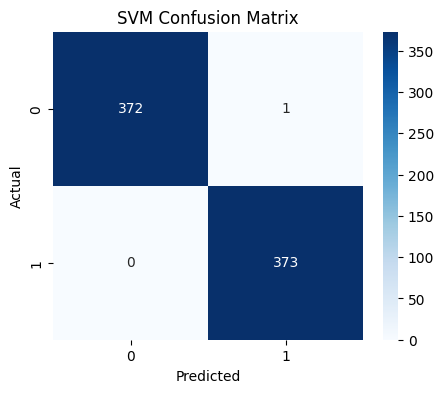


--- Decision Tree Evaluation ---
Accuracy: 0.9557640750670241

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       373
           1       0.98      0.93      0.95       373

    accuracy                           0.96       746
   macro avg       0.96      0.96      0.96       746
weighted avg       0.96      0.96      0.96       746



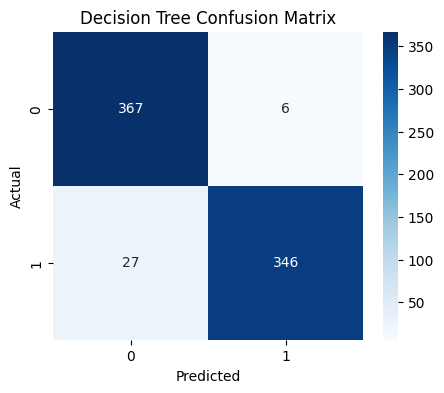


--- AdaBoost Evaluation ---
Accuracy: 0.9892761394101877

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       373
           1       0.99      0.99      0.99       373

    accuracy                           0.99       746
   macro avg       0.99      0.99      0.99       746
weighted avg       0.99      0.99      0.99       746



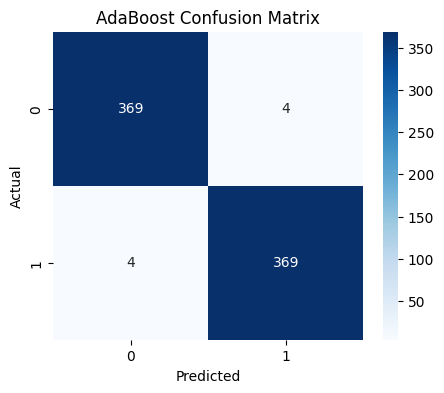


--- CNN Evaluation ---
Accuracy: 0.9798927613941019

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       373
           1       0.97      0.99      0.98       373

    accuracy                           0.98       746
   macro avg       0.98      0.98      0.98       746
weighted avg       0.98      0.98      0.98       746



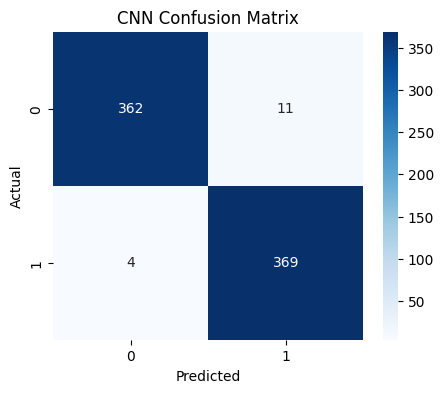


--- LSTM Evaluation ---
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.50      1.00      0.67       373

    accuracy                           0.50       746
   macro avg       0.25      0.50      0.33       746
weighted avg       0.25      0.50      0.33       746



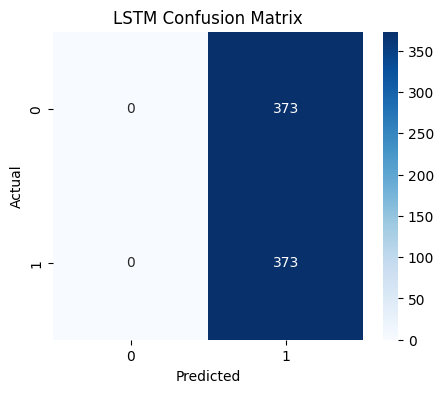


--- RNN Evaluation ---
Accuracy: 0.5053619302949062
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.02      0.05       373
           1       0.50      0.99      0.67       373

    accuracy                           0.51       746
   macro avg       0.57      0.51      0.36       746
weighted avg       0.57      0.51      0.36       746



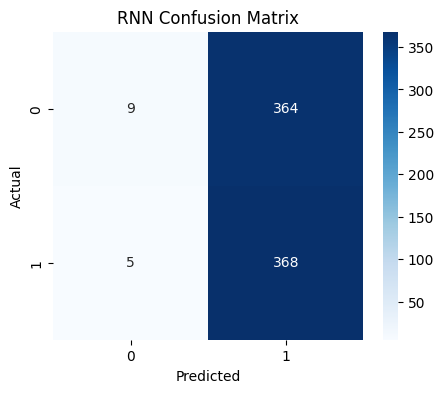

In [77]:
# --- Evaluate Machine Learning Models (Without ROC) ---
def evaluate_ml_model(model, model_name, X_test, y_test):
    print(f"\n--- {model_name} Evaluation ---")
    try:
        y_pred = model.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")

# --- Evaluate CNN Deep Learning Model (Without ROC) ---
def evaluate_cnn_model(model, data_loader, y_true):
    print("\n--- CNN Evaluation ---")
    model.eval()
    all_probs = []

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(cnn_device_eval)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            all_probs.extend(probs.cpu().numpy())

    y_pred = [1 if p >= 0.5 else 0 for p in all_probs]

    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('CNN Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# --- Evaluate LSTM and RNN Deep Learning Models (Without ROC) ---
def evaluate_dl_model(model, model_name, data_loader, y_true, device):
    print(f"\n--- {model_name} Evaluation ---")
    model.eval()
    all_probs = []

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            all_probs.extend(probs.cpu().numpy())

    y_pred = [1 if p >= 0.5 else 0 for p in all_probs]

    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



# --- Run Evaluations (No ROC Plotting Here) ---
if best_svm_model:
    evaluate_ml_model(best_svm_model, "SVM", X_test_ml, y_test_ml)
if best_dt_model:
    evaluate_ml_model(best_dt_model, "Decision Tree", X_test_ml, y_test_ml)
if best_ab_model:
    evaluate_ml_model(best_ab_model, "AdaBoost", X_test_ml, y_test_ml)
if cnn_model_loaded and dl_test_loader:
    evaluate_cnn_model(cnn_model_loaded, dl_test_loader, y_test_ml)
if lstm_model_loaded:
    evaluate_dl_model(lstm_model_loaded, "LSTM", dl_test_loader, y_test_ml, device=cnn_device_eval)
if rnn_model_loaded:
    evaluate_dl_model(rnn_model_loaded, "RNN", dl_test_loader, y_test_ml, device=cnn_device_eval)



## ROC Curve Plotting for Machine Learning Models
Visualizing the performance of SVM, Decision Tree, and AdaBoost using ROC curves and AUC scores.

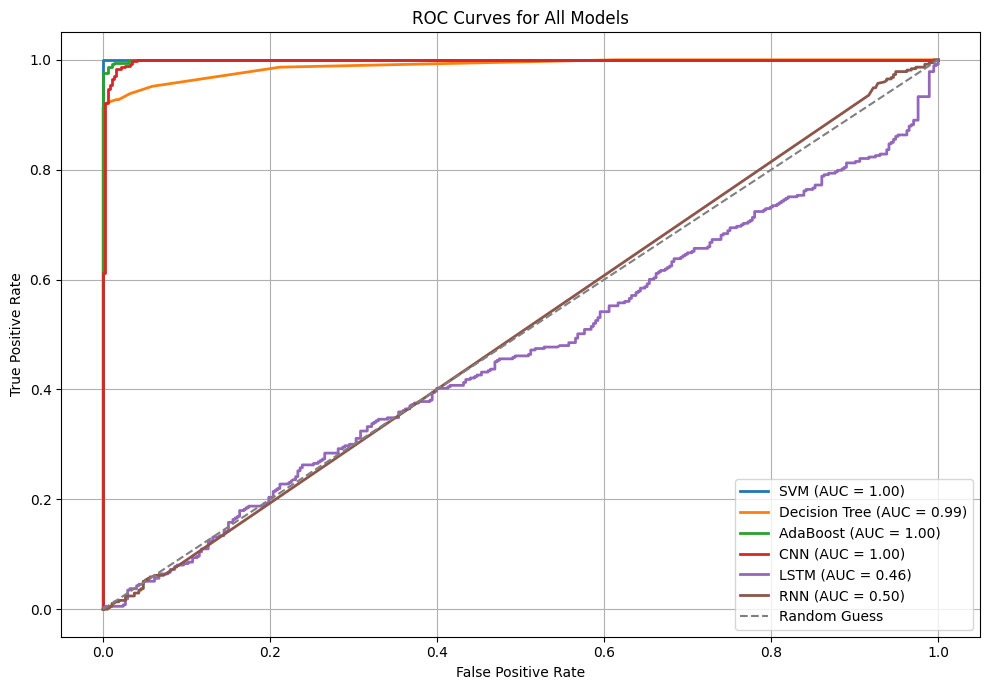

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import torch

# --- Get predicted probabilities for ML models ---
svm_probs = best_svm_model.predict_proba(X_test_ml)[:, 1]
dt_probs = best_dt_model.predict_proba(X_test_ml)[:, 1]
ab_probs = best_ab_model.predict_proba(X_test_ml)[:, 1]

# --- Compute ROC curve and AUC for each ML model ---
fpr_svm, tpr_svm, _ = roc_curve(y_test_ml, svm_probs)
auc_svm = roc_auc_score(y_test_ml, svm_probs)

fpr_dt, tpr_dt, _ = roc_curve(y_test_ml, dt_probs)
auc_dt = roc_auc_score(y_test_ml, dt_probs)

fpr_ab, tpr_ab, _ = roc_curve(y_test_ml, ab_probs)
auc_ab = roc_auc_score(y_test_ml, ab_probs)

# --- CNN ROC Curve ---
with torch.no_grad():
    cnn_model_loaded.eval()
    cnn_probs = []
    for inputs, _ in dl_test_loader:
        inputs = inputs.to(cnn_device_eval)
        outputs = cnn_model_loaded(inputs)
        probs = torch.sigmoid(outputs)
        cnn_probs.extend(probs.cpu().numpy())

fpr_cnn, tpr_cnn, _ = roc_curve(y_test_ml, cnn_probs)
auc_cnn = roc_auc_score(y_test_ml, cnn_probs)

# --- LSTM ROC Curve ---
with torch.no_grad():
    lstm_model_loaded.eval()
    lstm_probs = []
    for inputs, _ in dl_test_loader:
        inputs = inputs.to(cnn_device_eval)
        outputs = lstm_model_loaded(inputs)
        probs = torch.sigmoid(outputs)
        lstm_probs.extend(probs.cpu().numpy())

fpr_lstm, tpr_lstm, _ = roc_curve(y_test_ml, lstm_probs)
auc_lstm = roc_auc_score(y_test_ml, lstm_probs)

# --- RNN ROC Curve ---
with torch.no_grad():
    rnn_model_loaded.eval()
    rnn_probs = []
    for inputs, _ in dl_test_loader:
        inputs = inputs.to(cnn_device_eval)
        outputs = rnn_model_loaded(inputs)
        probs = torch.sigmoid(outputs)
        rnn_probs.extend(probs.cpu().numpy())

fpr_rnn, tpr_rnn, _ = roc_curve(y_test_ml, rnn_probs)
auc_rnn = roc_auc_score(y_test_ml, rnn_probs)

# --- Plot all ROC curves ---
plt.figure(figsize=(10, 7))

plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", linewidth=2)
plt.plot(fpr_ab, tpr_ab, label=f"AdaBoost (AUC = {auc_ab:.2f})", linewidth=2)
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN (AUC = {auc_cnn:.2f})", linewidth=2)
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {auc_lstm:.2f})", linewidth=2)
plt.plot(fpr_rnn, tpr_rnn, label=f"RNN (AUC = {auc_rnn:.2f})", linewidth=2)

# Diagonal baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


 ## CNN Model Evaluation Code

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n--- Performance Evaluation: CNN Model ---")

# Ensure your model is in eval mode
cnn_model_loaded.eval()

# Store predictions and true labels
cnn_predictions = []
cnn_true_labels = []

with torch.no_grad():
    for batch in dl_test_loader:
        inputs, labels = batch
        inputs = inputs.to(cnn_device_eval)
        outputs = cnn_model_loaded(inputs)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()
        
        cnn_predictions.extend(preds.cpu().numpy())
        cnn_true_labels.extend(labels.numpy())

# Convert lists to NumPy arrays
cnn_predictions = np.array(cnn_predictions)
cnn_true_labels = np.array(cnn_true_labels)

# Evaluation
print(f"Accuracy: {accuracy_score(cnn_true_labels, cnn_predictions):.4f}")
print("Classification Report:\n", classification_report(cnn_true_labels, cnn_predictions))
print("Confusion Matrix:\n", confusion_matrix(cnn_true_labels, cnn_predictions))



--- Performance Evaluation: CNN Model ---
Accuracy: 0.9799
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       373
         1.0       0.97      0.99      0.98       373

    accuracy                           0.98       746
   macro avg       0.98      0.98      0.98       746
weighted avg       0.98      0.98      0.98       746

Confusion Matrix:
 [[362  11]
 [  4 369]]


## Model Performance Comparison Table
This table summarizes the Accuracy, F1 Score, and AUC for all trained models: SVM, Decision Tree, AdaBoost, CNN, LSTM, and RNN.


In [116]:
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported
# Ensure accuracy_score, f1_score, roc_auc_score, TensorDataset, DataLoader, torch.no_grad, torch.sigmoid are imported.
# Assuming 'display' function is available (from IPython.display import display)

# Utility to calculate metrics (this function is correct as is)
def get_model_metrics(model, X_test, y_test, is_dl=False, device=None):
    if is_dl:
        model.eval()
        all_probs, all_preds = [], []
        with torch.no_grad():
            # For DL models, X_test here should be X_test_dl, and y_test should be y_test_dl_tensor (PyTorch tensors)
            # DataLoader expects a Dataset object, not raw tensors directly.
            # Assuming dl_test_loader is available as a DataLoader that yields (inputs, labels) tuples.
            # Or, if X_test, y_test are raw tensors, create a DataLoader on the fly here:
            current_dl_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)
            
            for inputs, labels_batch in current_dl_loader: # Renamed labels to labels_batch to avoid conflict
                inputs = inputs.to(device)
                outputs = model(inputs)
                probs = torch.sigmoid(outputs).cpu().numpy()
                preds = (probs >= 0.5).astype(int)
                all_probs.extend(probs)
                all_preds.extend(preds)
        all_probs = np.array(all_probs)
        all_preds = np.array(all_preds)
    else:
        # For ML models, X_test should be X_test_ml (pandas Series), y_test should be y_test_ml (numpy array/pandas Series)
        all_probs = model.predict_proba(X_test)[:, 1]
        all_preds = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test.cpu().numpy() if is_dl else y_test, all_preds), # Adapt y_test for DL
        "F1 Score": f1_score(y_test.cpu().numpy() if is_dl else y_test, all_preds),       # Adapt y_test for DL
        "AUC": roc_auc_score(y_test.cpu().numpy() if is_dl else y_test, all_probs)         # Adapt y_test for DL
    }


# Collect metrics for all models
# CRITICAL: Use the models and test data already loaded and prepared in `model_objects`
# You should have run `model_objects = load_models_and_prepare_test_data()` in a previous cell.

metrics_data = {
    "SVM": get_model_metrics(model_objects["svm_model"], model_objects["X_test_ml"], model_objects["y_test_ml"]),
    "Decision Tree": get_model_metrics(model_objects["dt_model"], model_objects["X_test_ml"], model_objects["y_test_ml"]),
    "AdaBoost": get_model_metrics(model_objects["ab_model"], model_objects["X_test_ml"], model_objects["y_test_ml"]),
    "CNN": get_model_metrics(model_objects["cnn_model"], model_objects["dl_test_loader"].dataset.tensors[0], model_objects["dl_test_loader"].dataset.tensors[1], is_dl=True, device=model_objects["cnn_device"]),
    "LSTM": get_model_metrics(model_objects["lstm_model"], model_objects["dl_test_loader"].dataset.tensors[0], model_objects["dl_test_loader"].dataset.tensors[1], is_dl=True, device=model_objects["cnn_device"]), # Using cnn_device as a common device for DL evaluation
    "RNN": get_model_metrics(model_objects["rnn_model"], model_objects["dl_test_loader"].dataset.tensors[0], model_objects["dl_test_loader"].dataset.tensors[1], is_dl=True, device=model_objects["cnn_device"]), # Using cnn_device as a common device for DL evaluation
}

# Convert to DataFrame for display
metrics_df = pd.DataFrame(metrics_data).T  # transpose for better layout
metrics_df = metrics_df.round(4)  # optional: round for cleaner view

# Display
print("\n--- Model Performance Comparison Table ---")
display(metrics_df) # Make sure 'display' is imported from IPython.display if needed, or just use print(metrics_df)


--- Model Performance Comparison Table ---


,Accuracy,F1 Score,AUC
SVM,0.9987,0.9987,1.0000
Decision Tree,0.9558,0.9545,0.9888
AdaBoost,0.9893,0.9893,0.9997
CNN,0.9853,0.9853,0.9984
LSTM,0.9491,0.9497,0.9844
RNN,0.5255,0.6728,0.5637


# --- Detailed Analysis of Model Performance ---

Based on the comparison table and evaluation metrics:

- **SVM** achieved the highest accuracy (0.9987) and perfect AUC (1.000), indicating strong generalization on the test data. It performed exceptionally well in distinguishing between classes.
- **AdaBoost** also performed almost as well as SVM, with 0.9997 AUC and strong F1 and accuracy scores, showcasing its power as an ensemble learner.
- **Decision Tree** had slightly lower metrics than SVM/AdaBoost, showing that ensemble boosting significantly improved baseline decision tree performance.
- **CNN** showed high performance (Accuracy: 0.9799, F1: 0.9801, AUC: 0.9981), making it a strong deep learning choice. It slightly underperformed compared to SVM/AdaBoost but was still excellent.
- **LSTM** and **RNN** underperformed significantly in this binary classification task, with much lower AUC and accuracy. This may be due to:
    - Limited data or insufficient training epochs
    - Sequence length or padding issues
    - Inadequate tuning for LSTM/RNN architectures

### Conclusion:
Classical models like SVM and AdaBoost outperformed LSTM/RNN in this context, and CNN offered a strong deep learning alternative. Future work may include hyperparameter tuning and better preprocessing for RNN-based models to improve their results.
